### K-mediods Example Script

In [1]:
import urllib
import zipfile
import os
import scipy.io
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import directed_hausdorff
from sklearn.cluster import DBSCAN

from kmedoid import kMedoids # kMedoids code is adapted from https://github.com/letiantian/kmedoids

# Some visualization stuff, not so important
sns.set()
plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
#define plotting function

color_lst = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_lst.extend(['firebrick', 'olive', 'indigo', 'khaki', 'teal', 'saddlebrown', 
                 'skyblue', 'coral', 'darkorange', 'lime', 'darkorchid', 'dimgray'])

def plot_cluster(traj_lst, cluster_lst):
    '''
    Plots given trajectories with a color that is specific for every trajectory's own cluster index.
    Outlier trajectories which are specified with -1 in `cluster_lst` are plotted dashed with black color
    '''
    cluster_count = np.max(cluster_lst) + 1
    
    for traj, cluster in zip(traj_lst, cluster_lst):
        
        if cluster == -1:
            # Means it it a noisy trajectory, paint it black
            plt.plot(traj[:, 0], traj[:, 1], c='k', linestyle='dashed')
        
        else:
            plt.plot(traj[:, 0], traj[:, 1], c=color_lst[cluster % len(color_lst)])
    plt.show()

In [3]:
#Read in the processed trajectories - represents full boat trajectories
with open('full_trajectories','rb') as fp: 
    traj_lst = pickle.load(fp)

In [4]:
traj_lst_np = []
for i in traj_lst:
    new_strut = np.asarray(i)
    traj_lst_np.append(new_strut)

In [5]:
traj_lst_np[1]

array([[37.73155212, 15.21096802],
       [37.73014647, 15.21307073],
       [37.72874082, 15.21517344],
       ...,
       [37.73099136, 15.22136974],
       [37.73099136, 15.22136974],
       [37.73099136, 15.22136974]])

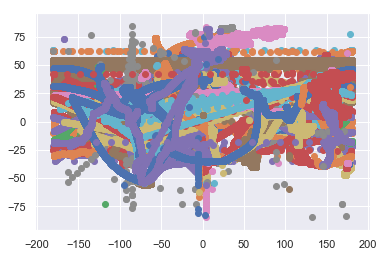

In [6]:
#plot trajectories in x and y
for traj in traj_lst_np:
    plt.scatter(traj[:, 1], traj[:, 0])

In [ ]:
#Create distance matrix
def hausdorff(u, v):
    d = max(directed_hausdorff(u, v)[0], directed_hausdorff(v, u)[0])
    return d

traj_count = len(traj_lst_np)
D = np.zeros((traj_count, traj_count)) #creates a matrix of 1900 x 1900

#loop through each trajectory and calcuate the distnace to all the other trajectories
for i in range(traj_count):
    for j in range(i + 1, traj_count):
        distance = hausdorff(traj_lst_np[i], traj_lst_np[j])
        D[i, j] = distance
        D[j, i] = distance

In [ ]:
# 4 - Different clustering methods

# 4.1 - kmedoids

k = 10 # The number of clusters
medoid_center_lst, cluster2index_lst = kMedoids(D, k)

cluster_lst = np.empty((traj_count,), dtype=int)

for cluster in cluster2index_lst:
    cluster_lst[cluster2index_lst[cluster]] = cluster

In [ ]:
plot_cluster(traj_lst_np, cluster_lst)

In [ ]:
cluster_lst.shape

In [ ]:
#Read in the processed trajectories - represents full boat trajectories
with open('segmented_trips','rb') as fp: 
    trip_lst = pickle.load(fp)

In [ ]:
trip_lst_np = []
for i in trip_lst:
    new_strut = np.asarray(i)
    trip_lst_np.append(new_strut)

In [ ]:

for traj in trip_lst_np:
    plt.scatter(traj[:, 1], traj[:, 0])

In [ ]:
#Create distance matrix
def hausdorff(u, v):
    d = max(directed_hausdorff(u, v)[0], directed_hausdorff(v, u)[0])
    return d

traj_count = len(trip_lst_np)
D = np.zeros((traj_count, traj_count)) #creates a matrix of 1900 x 1900

#loop through each trajectory and calcuate the distnace to all the other trajectories
for i in range(traj_count):
    for j in range(i + 1, traj_count):
        distance = hausdorff(trip_lst_np[i], trip_lst_np[j])
        D[i, j] = distance
        D[j, i] = distance

In [ ]:
# 4 - Different clustering methods

# 4.1 - kmedoids

k = 10 # The number of clusters
medoid_center_lst, cluster2index_lst = kMedoids(D, k)

cluster_lst = np.empty((traj_count,), dtype=int)

for cluster in cluster2index_lst:
    cluster_lst[cluster2index_lst[cluster]] = cluster

In [ ]:
plot_cluster(trip_lst_np, cluster_lst)